In [1]:
import numpy as np 
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('./../Dataset/US_Heart_Patients_2.csv')

### Classification -

    1. Logistic Regression
    2. DT Classifier             - (probability)
    3. Naive Bayes Classifier    - (conditional probability)
    4. Random forest Classifier
    5. Linear Discriminant
    6. XG boost
    7. Gradient boost
    8. SVM

## Logistic Regression (log)

it can do classification and probability of that class

In [5]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [6]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose'] 

In [7]:
round(df[num].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0


#### when we divide std/mean, it's called coefficient of variation

In [9]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [10]:
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

In [11]:
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

#### Null Variable Num Treatment

In [13]:
for i in num:
    df[i].fillna(df[i].mean, inplace=True)

In [14]:
df.isnull().sum()

Gender               8
age                  0
education          110
currentSmoker        3
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol      0
Systolic BP          0
Diastolic BP         0
BMI                  0
heartRate            0
glucose              0
Heart-Att            0
dtype: int64

#### Null Variable Cat Treatment

In [16]:
for i in cat:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [18]:
df.dtypes

Gender              object
age                 object
education          float64
currentSmoker      float64
cigsPerDay          object
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol     object
Systolic BP         object
Diastolic BP        object
BMI                 object
heartRate           object
glucose             object
Heart-Att            int64
dtype: object

In [19]:
# List of columns to convert
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose'] 

# Convert each column in the list to numeric, coercing errors to NaN
for col in num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the data types after conversion
print(df.dtypes)

Gender              object
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object


In [20]:
df[num].corr()

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
age,1.000000,-0.192650,0.262766,0.394171,0.205470,0.135013,-0.011286,0.121767
cigsPerDay,-0.192650,1.000000,-0.026347,-0.089327,-0.057158,-0.093346,0.074742,-0.058460
tot cholesterol,0.262766,-0.026347,1.000000,0.208652,0.164058,0.115813,0.091466,0.046644
Systolic BP,0.394171,-0.089327,0.208652,1.000000,0.784030,0.326623,0.183439,0.140251
Diastolic BP,0.205470,-0.057158,0.164058,0.784030,1.000000,0.377113,0.181653,0.060501
BMI,0.135013,-0.093346,0.115813,0.326623,0.377113,1.000000,0.068369,0.086618
heartRate,-0.011286,0.074742,0.091466,0.183439,0.181653,0.068369,1.000000,0.094261
glucose,0.121767,-0.058460,0.046644,0.140251,0.060501,0.086618,0.094261,1.000000


In [21]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
df['Gender'] = df['Gender'].replace(to_replace=['Male','Female'], value=[1,0])

In [24]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
df['Heart-Att'].unique()

array([0, 1], dtype=int64)

In [26]:
df.dtypes

Gender               int64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object

In [27]:
# # List of columns to convert
# Num = ['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI', 'heartRate', 'glucose']

# # Convert each column in the list to numeric, coercing errors to NaN
# for col in Num:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Check the data types after conversion
# print(df.dtypes)

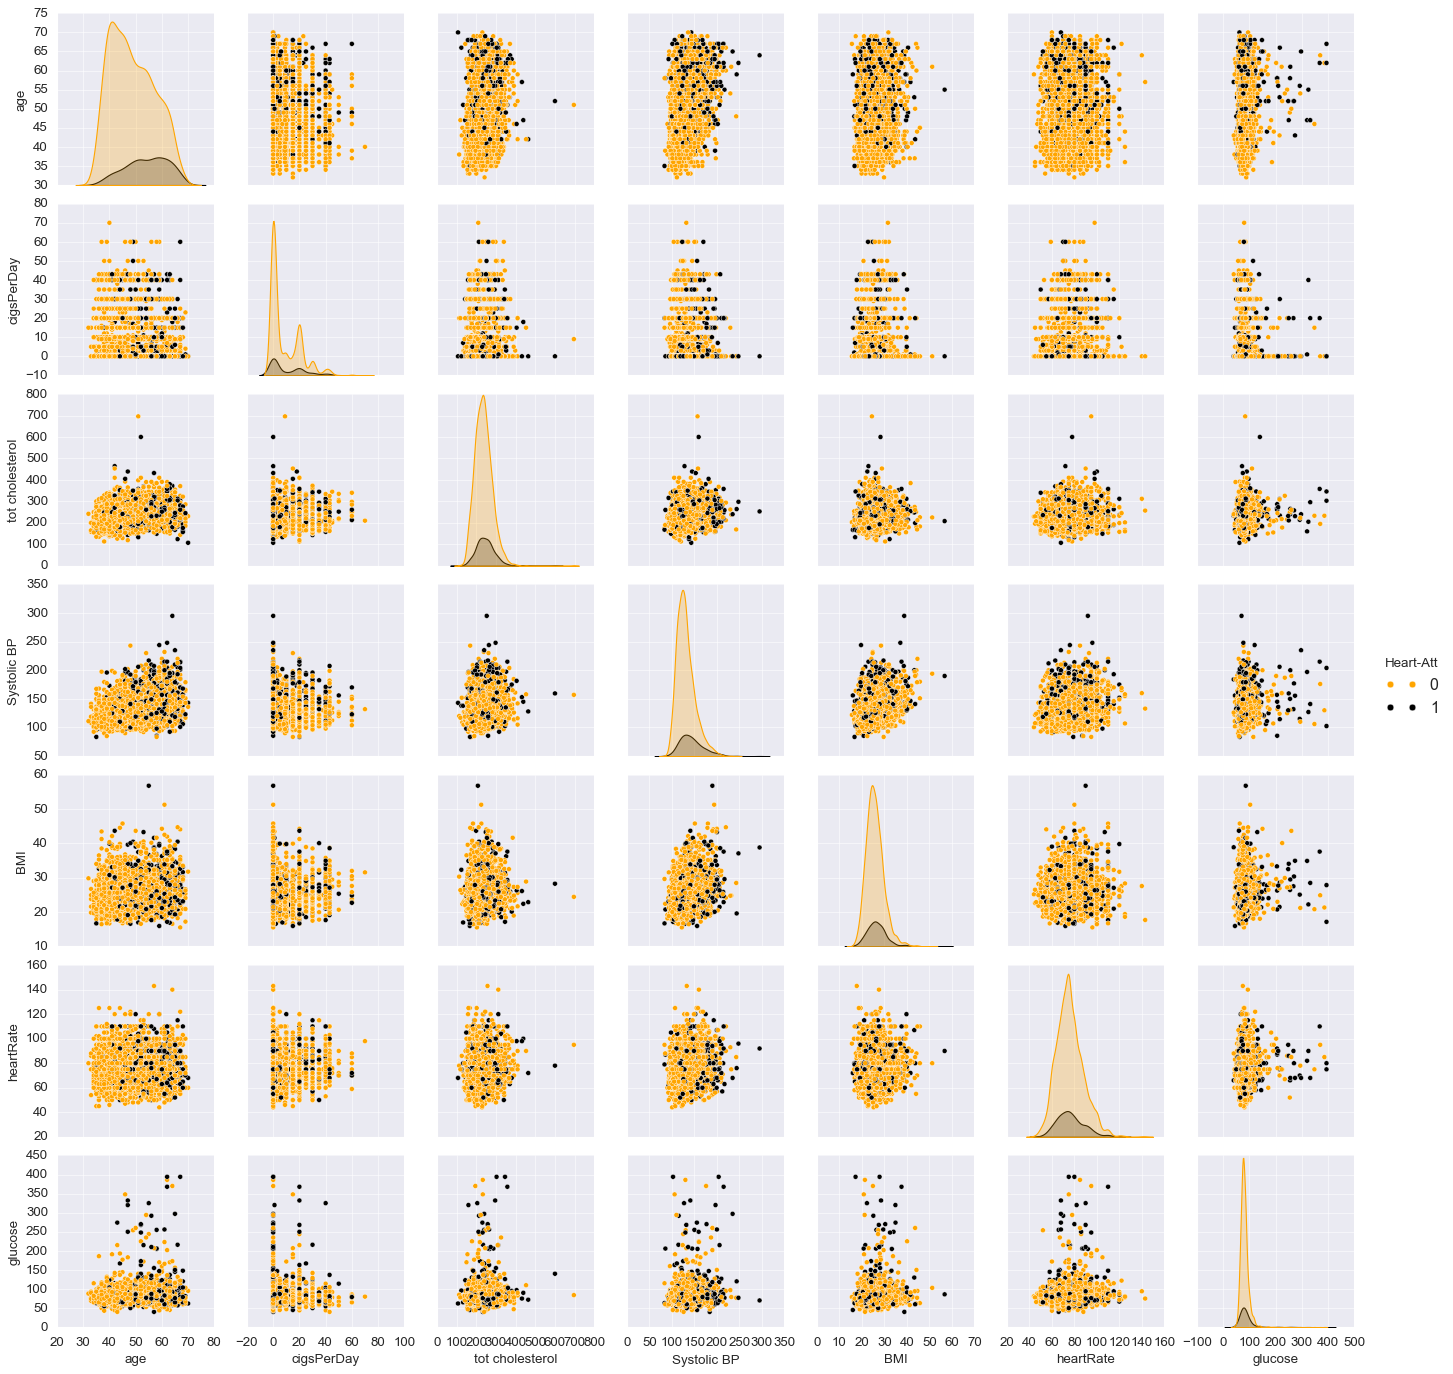

In [28]:
# Set the Matplotlib style to 'dark_background'
plt.style.use('dark_background')

# Set the theme and style
sns.set_style(style="darkgrid")
sns.set_palette("magma")

sns.pairplot(df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']],
             hue='Heart-Att',
             palette=['orange','black'])  #orange is safe and black is heart-attack

In [29]:
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')

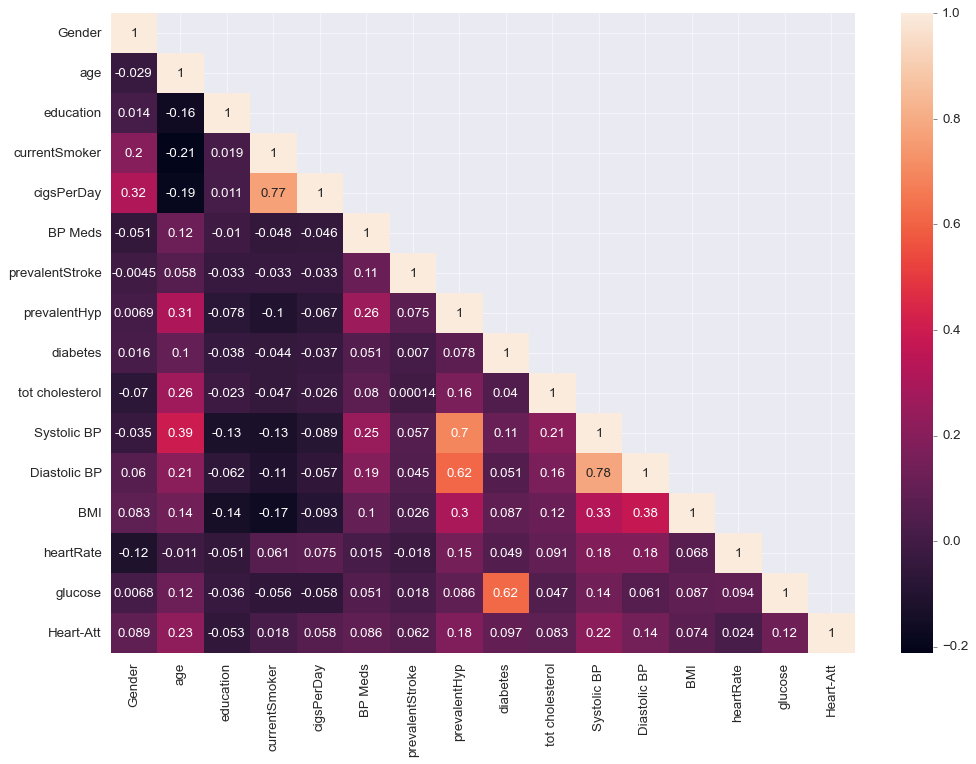

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1)); #triu means trim the upper part

In [31]:
data = df.copy()

In [32]:
df.drop(['diabetes', 'currentSmoker', 'Diastolic BP',], axis=1, inplace=True)

In [33]:
df.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0


# Outlier Removal / Treatment

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

Num = ['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI', 'heartRate', 'glucose']

for column in df[Num].columns: 
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<Axes: >

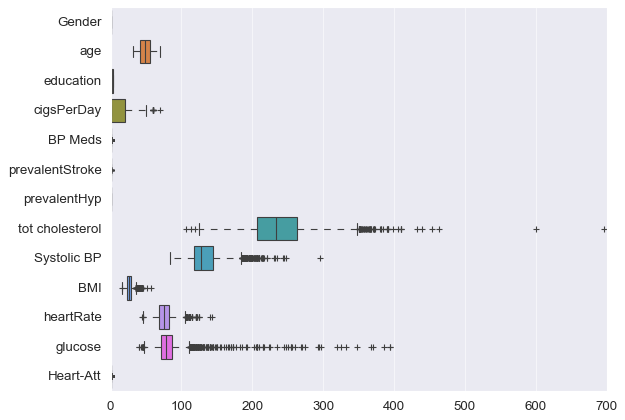

In [36]:
sns.boxplot(df, orient='h')

In [37]:
df.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0


### Test-Train Data

In [39]:
# Copy all the predictor variables into X dataframe
X = df.drop('Heart-Att', axis=1)

# Copy target into the y dataframe.
Y = df['Heart-Att']

In [40]:
X.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0


In [41]:
X.isna().sum()

Gender               0
age                  2
education            0
cigsPerDay          31
BP Meds              0
prevalentStroke      0
prevalentHyp         0
tot cholesterol     60
Systolic BP          4
BMI                 24
heartRate            4
glucose            391
dtype: int64

In [42]:
Y.isna().sum()

0

In [43]:
# Identify columns with missing values
cols_with_missing = X.columns[X.isnull().any()]

In [44]:
cols_with_missing

Index(['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [45]:
# Calculate the percentage of missing values in each column
missing_percentage = (X.isnull().sum() / len(X)) * 100

# Print the percentage of missing values
print(missing_percentage) 

Gender             0.000000
age                0.047170
education          0.000000
cigsPerDay         0.731132
BP Meds            0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
tot cholesterol    1.415094
Systolic BP        0.094340
BMI                0.566038
heartRate          0.094340
glucose            9.221698
dtype: float64


there are NaN values in X so we need to replace them

In [47]:
from sklearn.impute import SimpleImputer

# Create an imputer object using the 'median' strategy
imputer = SimpleImputer(strategy='median') 

# Fit and transform the imputer on your data
X[cols_with_missing] = imputer.fit_transform(X[cols_with_missing])

#====================================== above is fine for now ==========================


# Create imputers
# num_imputer = SimpleImputer(strategy='median')
# cat_imputer = SimpleImputer(strategy='most_frequent')  # we don't need this now as NAN only present in numerical colimns

# Impute numerical columns
# num_cols = cols_with_missing[cols_with_missing.isin(X._get_numeric_data().columns)]
# df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [48]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [49]:
X.isna().sum()

Gender             0
age                0
education          0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
tot cholesterol    0
Systolic BP        0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [50]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state= 1) 

### Model Building

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, Y_train)

LogisticRegression()

#### Model Evaluation

In [55]:
y_train_predict = model.predict(X_train)

In [56]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy = (correct)/(total prediction)

##### Accuracy check

In [59]:
## Accuracy of the model
model.score(X_train, Y_train)

0.8480458221024259

accuracy is not the best way to judge a model

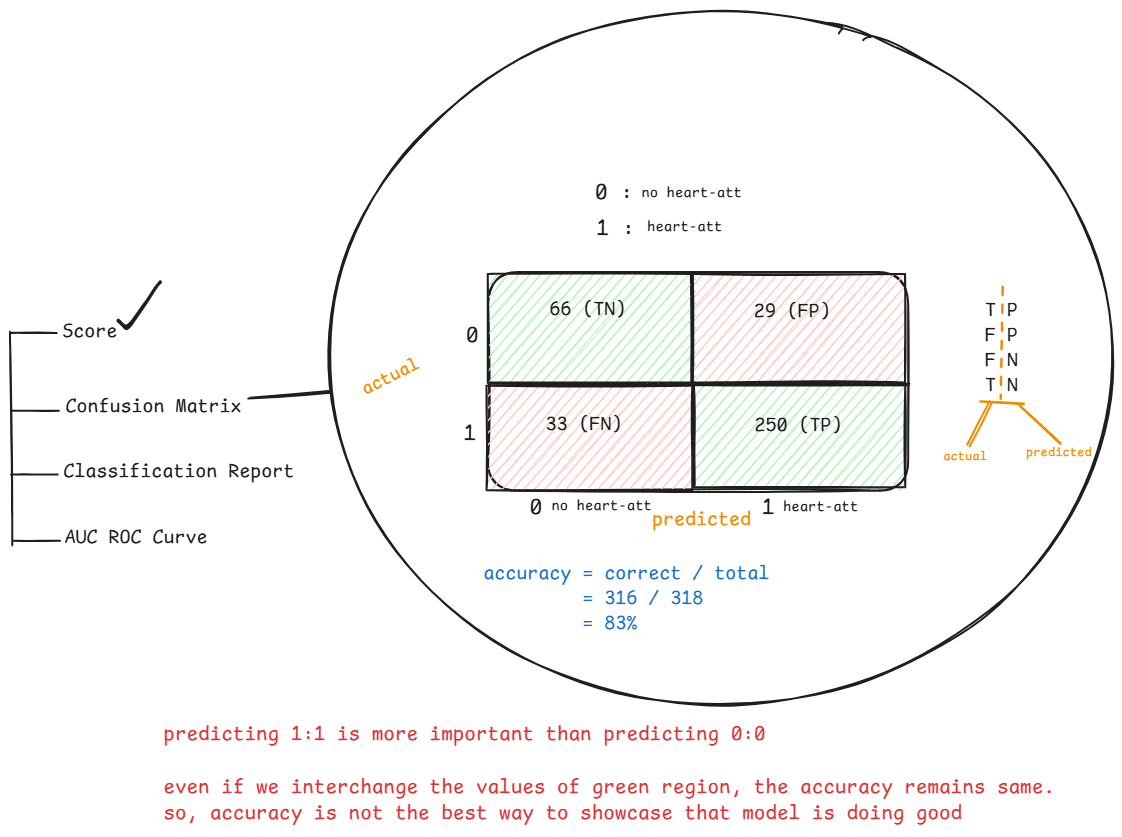

###### FP : Type1 Error
###### FN : Type2 Error

#### Confusion Matrix

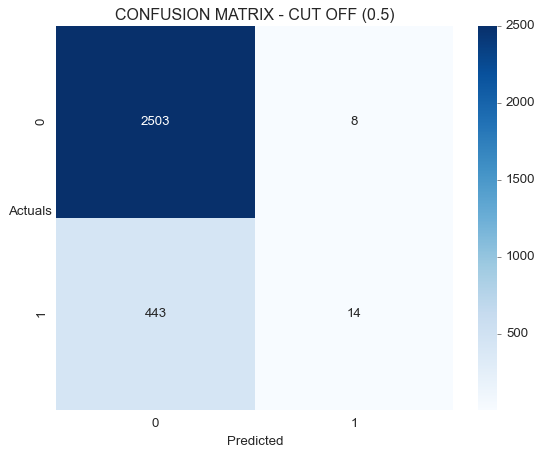

In [64]:
sns.heatmap((metrics.confusion_matrix(Y_train, y_train_predict)), annot=True, fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)');

In [65]:
metrics.confusion_matrix(Y_train, y_train_predict)

array([[2503,    8],
       [ 443,   14]], dtype=int64)

#### Classification Report

In [67]:
print(metrics.classification_report(Y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.64      0.03      0.06       457

    accuracy                           0.85      2968
   macro avg       0.74      0.51      0.49      2968
weighted avg       0.82      0.85      0.79      2968



---
Let's check the Confusion Matrix and Classification Report on Test Data

In [69]:
# Checking the model on test data
y_test_predict = model.predict(X_test)

In [70]:
y_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
## Accuracy of the model
model.score(X_test, Y_test)

0.8498427672955975

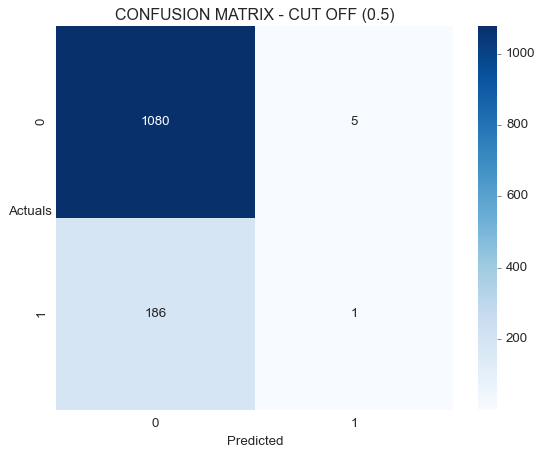

In [72]:
sns.heatmap((metrics.confusion_matrix(Y_test, y_test_predict)), annot=True, fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)');

In [73]:
print(metrics.classification_report(Y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.17      0.01      0.01       187

    accuracy                           0.85      1272
   macro avg       0.51      0.50      0.46      1272
weighted avg       0.75      0.85      0.79      1272



##### AUC ROC CURVE

AUC: 0.666


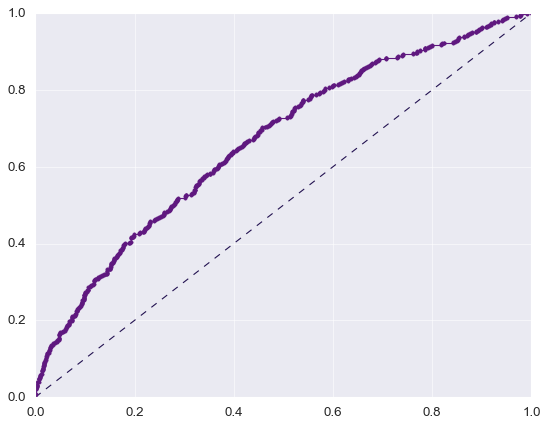

In [75]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [76]:
def evaluate_train_model(model):
    y_train_predict = model.predict(X_train)

    Acc_train = print(model.score(X_train,Y_train))

    CM_train = print(sns.heatmap((metrics.confusion_matrix(Y_train,y_train_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(Y_train,y_train_predict))

    probs = model.predict_proba(X_train)
    probs = probs[:, 1]
    auc_train = roc_auc_score(Y_train, probs)
    
    return Acc_train,CM_train,CR_train,auc_train  

0.8480458221024259
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.64      0.03      0.06       457

    accuracy                           0.85      2968
   macro avg       0.74      0.51      0.49      2968
weighted avg       0.82      0.85      0.79      2968



(None, None, None, 0.6664026205919338)

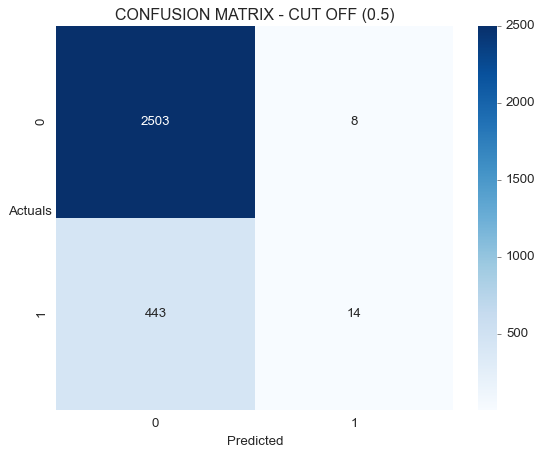

In [77]:
evaluate_train_model(model) # report of the train data

In [78]:
# now on the test data

AUC: 0.693


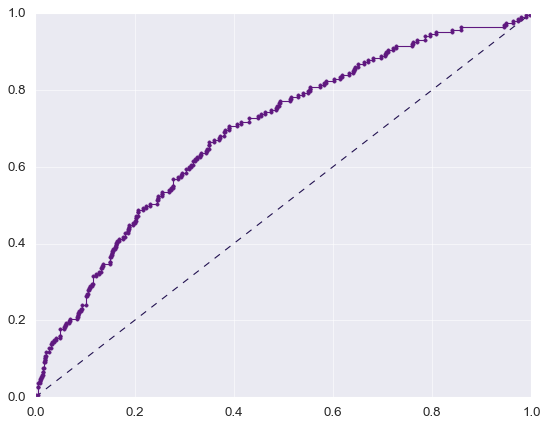

In [79]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [80]:
def evaluate_train_model(model):
    y_train_predict = model.predict(X_test)

    Acc_train = print(model.score(X_test,Y_test))

    CM_train = print(sns.heatmap((metrics.confusion_matrix(Y_test,y_test_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(Y_test,y_test_predict))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    auc_train = roc_auc_score(Y_test, probs)
    
    return Acc_train,CM_train,CR_train,auc_train  

0.8498427672955975
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.17      0.01      0.01       187

    accuracy                           0.85      1272
   macro avg       0.51      0.50      0.46      1272
weighted avg       0.75      0.85      0.79      1272



(None, None, None, 0.692801695458242)

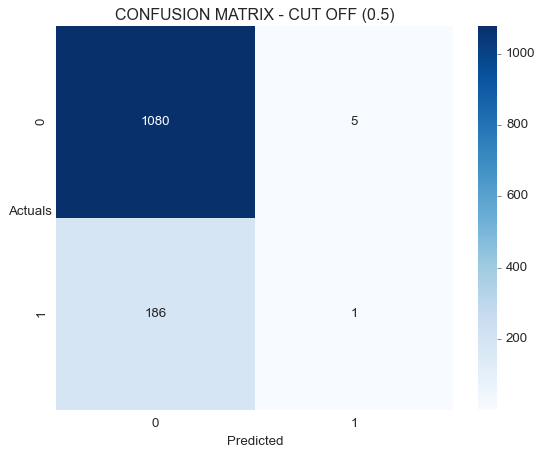

In [81]:
evaluate_train_model(model) # report of the test data

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4238 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


In [147]:
cat

['education',
 'currentSmoker',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'Gender']

In [112]:
data.isna().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BP Meds              0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [114]:
from sklearn.impute import SimpleImputer

# Assuming 'df' is your original DataFrame

# 1. Create an imputer object
imputer = SimpleImputer(strategy='median')  # Replace 'mean' with 'median' or 'most_frequent' as needed

# 2. Fit the imputer to your DataFrame
imputer.fit(data) 

# 3. Transform the DataFrame to replace missing values
data = pd.DataFrame(imputer.transform(data), columns=data.columns) 

# Now 'df_imputed' contains the DataFrame with missing values imputed

# Use 'df_imputed' for your subsequent analysis or tasks

In [116]:
data.isna().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [118]:
df1 = data.copy()

In [120]:
df1.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [122]:
for i in cat:
    df1[i] = df1[i].astype("object")

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4240 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   float64
dtypes: float64(9), object(7)
memory usage: 530.1+ KB


# Encoding

In [127]:
# get dummies from df1 as we have changed the datatype of cat to objects in df1
data_encoded = pd.get_dummies(df1, columns = cat, drop_first = False)

In [129]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

data_encoded

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att,education_1.0,education_2.0,education_3.0,education_4.0,currentSmoker_0.0,currentSmoker_1.0,BP Meds_0.0,BP Meds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0,Gender_0.0,Gender_1.0
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,False,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,True,False,False,False,False,True,True,False,True,False,True,False,True,False,False,True
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,False,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,78.0,0.0,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0,False,False,True,False,True,False,True,False,True,False,False,True,True,False,False,True


In [131]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4240 non-null   float64
 1   cigsPerDay           4240 non-null   float64
 2   tot cholesterol      4240 non-null   float64
 3   Systolic BP          4240 non-null   float64
 4   Diastolic BP         4240 non-null   float64
 5   BMI                  4240 non-null   float64
 6   heartRate            4240 non-null   float64
 7   glucose              4240 non-null   float64
 8   Heart-Att            4240 non-null   float64
 9   education_1.0        4240 non-null   bool   
 10  education_2.0        4240 non-null   bool   
 11  education_3.0        4240 non-null   bool   
 12  education_4.0        4240 non-null   bool   
 13  currentSmoker_0.0    4240 non-null   bool   
 14  currentSmoker_1.0    4240 non-null   bool   
 15  BP Meds_0.0          4240 non-null   b

In [133]:
data_encoded.isna().sum()

age                    0
cigsPerDay             0
tot cholesterol        0
Systolic BP            0
Diastolic BP           0
BMI                    0
heartRate              0
glucose                0
Heart-Att              0
education_1.0          0
education_2.0          0
education_3.0          0
education_4.0          0
currentSmoker_0.0      0
currentSmoker_1.0      0
BP Meds_0.0            0
BP Meds_1.0            0
prevalentStroke_0.0    0
prevalentStroke_1.0    0
prevalentHyp_0.0       0
prevalentHyp_1.0       0
diabetes_0.0           0
diabetes_1.0           0
Gender_0.0             0
Gender_1.0             0
dtype: int64

In [135]:
# Copy all the predictor variables into X dataframe
X = data_encoded.drop('Heart-Att', axis=1)

# Copy target into the y dataframe.
Y = data_encoded['Heart-Att']

In [137]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state= 1) 

In [139]:
model.fit(X_train, Y_train)

LogisticRegression()

0.8577044025157232
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1085
         1.0       0.17      0.01      0.01       187

    accuracy                           0.85      1272
   macro avg       0.51      0.50      0.46      1272
weighted avg       0.75      0.85      0.79      1272



(None, None, None, 0.7100273540501245)

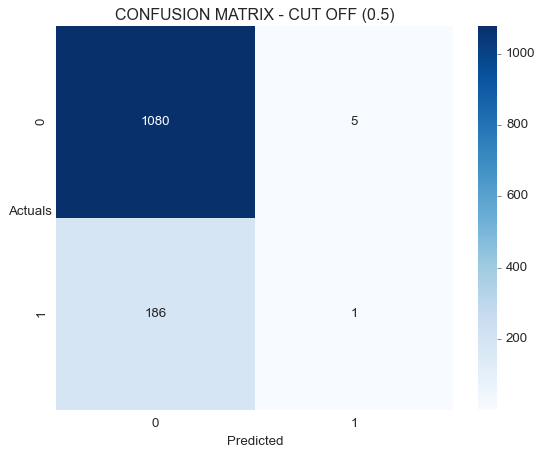

In [141]:
evaluate_train_model(model)